In [1]:
def get_rid_of_spine(axes):
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)

In [2]:
# label each bar directly
def label_each_bar(axes):
    for ax in axes:
        for p in ax.patches:
            ax.annotate(
                format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [3]:
def build_bar_plot(x, y, hue, ax, order, cmap, df):
    return (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=order, palette=cmap, ax=ax))

In [4]:
def set_yticks_empty(g_list):
    for g in g_list:
        g.axes.get_yaxis().set_ticks([])

In [5]:
# import all necessary libraries
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# colormaps
cmap_pol = ["#0015BC", "#9cfc8b", "#FF0000", "#a3a3a3"]
palette_sex = ['salmon', 'steelblue']

# style
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set_style('white')

In [6]:
# import the dataset
location = '../data/anes_pilot_2020ets_csv.csv'
df = pd.read_csv(location)
df.head()

,V1,StartDate,EndDate,_v1,RecordedDate,ResponseId,qmetadata_Browser,qmetadata_Version,_v2,qmetadata_Resolution,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
0,1451,4/12/2020 17:04,4/12/2020 17:23,1131,4/12/2020 17:23,R_3oBJppI62KNh4MC,Chrome,81.0.4044.96,Android 9,360x760,...,9,1,0,0,0,0,0,1,2.0,1
1,2875,4/16/2020 10:14,4/16/2020 11:06,3170,4/16/2020 11:06,R_1jdLlxoKBpgExZS,Firefox,52,Windows NT 5.1,1024x768,...,16,1,0,0,0,0,0,1,3.0,0
2,859,4/17/2020 21:34,4/17/2020 22:32,3490,4/17/2020 22:32,R_ClTXw6WOcfMOLWp,Chrome,81.0.4044.111,Android 9,360x760,...,6,0,0,0,0,0,0,5,3.0,0
3,2031,4/16/2020 17:29,4/16/2020 18:34,3885,4/16/2020 18:34,R_3sjr4zeG5BbBJa0,Chrome,78.0.3904.96,Android 7.1.1,320x570,...,13,1,0,0,0,0,0,1,3.0,1
4,587,4/16/2020 15:20,4/16/2020 15:59,2330,4/16/2020 15:59,R_21H8jh0vE4GUqI5,Chrome,80.0.3987.132,Windows NT 10.0,1920x1080,...,4,0,1,0,0,0,0,2,2.0,0


<center><h1>Introduction</h1></center>
<center><img src="../figs/luis-villasmil-mlVbMbxfWI4-unsplash.jpg" align="center" alt='financial tree by micheile-henderson' style="width: 600px;"/></center>
<br>
<br>
Stress and anxiety have long been proven to affect our health negatively. According to <a href="https://www.healthline.com">Healthline.com</a>, anxiety disorders can cause rapid heart rate, palpitations, and chest pain. It increases the risk of high blood pressure and heart disease. For those with heart disease, anxiety disorders may raise the risk of coronary events. It also affects our excretory and digestive systems, immune system, and respiratory system. It causes headaches, muscle tension, insomnia, depression, and social isolation.
<br>
<br>
We all experience stress and anxiety at some point in our life. To be more precise, according to 
<a href="https://www.nimh.nih.gov/health/statistics/any-anxiety-disorder.shtml"> National Institute of Mental Health</a>, an estimated 19.1% of U.S. adults had an anxiety disorder in the past year. This means that approximately 1 in 5 Americans had this unpleasant experience in the past 12 months. Moreover, an estimated 31.1% of U.S. adults experience an anxiety disorder at some point in their lives.
<br>
<br>
2020 had been a difficult year for people all around the globe, and Americans are no exception. According to a new public opinion poll released in October 2020 by the American Psychiatric Association, 62% of Americans feel more anxious than they did at this time last year. Even though this data is for October, April wasn't an easy month either. In this study, I want to explore the influence of politics, economic situation, and pandemic as key themes of 2020 on Americans' emotional well-being in April of 2020.

<center><h1>A "Data Story" on What Affected the Emotional Well-being of Americans in 2020. Did It Vary for Different Social Groups?
</h1></center>

<center><img src="../figs/kelly-sikkema-5yxPOMHymlw-unsplash.jpg" align="center" style="width: 600px;"/></center>

> **"They say a person needs just three things to be truly happy in this world: Someone to love, something to do, and something to hope for."** (Tom Bodett) 

<h2>General info about the dataset:</h2>

For this project, I will be using [2020 Exploratory Testing Survey](https://electionstudies.org/data-center/2020-exploratory-testing-survey/) data by the American National Election Studies organiation.

## Limitations of data:
1. According to ANES, we can't make any inferences that relate to respondent location.
2. Dataset is not balanced. <br>
    2.1 There are only 27 people representing Hawaiians or Pac. Islanders. <br>
    2.2 Only 3% of responders said that they are neither republicans, democrats, nor independent. 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Columns: 470 entries, V1 to vidknow
dtypes: float64(3), int64(453), object(14)
memory usage: 11.0+ MB


As we can see, the survey was completed by 3,080 individuals. In total, it has 470 columns, which correspond to the total number of questions. However, note that some of the questions are survey-specific, meaning each individual answered less than 470 questions. 

To answer my particular research question, I first selected a subset of questions(columns) that I think are the most relevant and renamed them with proper descriptive names.

### Selecting a subset of values & renaming features

In [8]:
df1 = df[['worried', 'happy', 'birthyr', 'sex', 'pid1r',
          'impact1', 'impact2', 'impact8', 'impact9',
          'finworry', 'confecon', 
          'health1', 'covid1', 'covid2', 
          'inc_anes', 'inc_cps', 'inc_cpsmod']]

# Rename Columns
column_labels=['Worried', 'Happy', 'Birth Year', 'Sex', 'Political Party',
               'Political Impact', 'Stress from Politics', 'Hurt Relat. with Family', 'Hurt Relat. with Friends',
               'Fin.Situation', 'Nat. Econ',
               'Health', 'Covid.P', 'Covid.E', 
               'Income All 2019 liv. together', 'Income All Past 12', 'Income All Past 12 liv. together']

df1.columns = column_labels

<h3>Missing values</h3>
After renaming all of the columns, I dropped all missing values. 

Note: I was first considering interpolating some of the values with mean/median values. However, after exploring the dataset closely, I realized that there are too many parameters on which this value may depend. Besides, there were only 10 missing values(responses) out of 3080. Therefore, I decided to drop them because it will not greatly affect my study.

In [9]:
# Drop missing values
to_drop = list(df1[df1['Political Party'] == 9].index)
to_drop += list(df1[df1['Nat. Econ'] == 9].index)
to_drop += list(df1[df1['Fin.Situation'] == 9].index)
to_drop += list(df1[df1['Covid.P'] == 9].index)
to_drop += list(df1[df1['Income All Past 12'] == 99].index)
to_drop += list(df1[df1['Income All Past 12 liv. together'] == 99].index)

df1 = df1.drop(to_drop)

#total number of responses in the dataset
total = len(df1)

df1.head()

,Worried,Happy,Birth Year,Sex,Political Party,Political Impact,Stress from Politics,Hurt Relat. with Family,Hurt Relat. with Friends,Fin.Situation,Nat. Econ,Health,Covid.P,Covid.E,Income All 2019 liv. together,Income All Past 12,Income All Past 12 liv. together
0,3,3,1992,2,1,4,3,3,3,2,2,3,5,2,66,10,66
1,3,4,1959,2,1,5,3,3,3,2,2,3,4,3,7,66,66
2,5,1,1974,1,4,4,3,4,5,5,5,2,3,2,10,66,66
3,2,2,1954,2,1,5,4,5,5,4,3,1,3,3,1,66,66
4,2,2,1966,1,2,4,5,5,5,4,4,3,3,3,11,66,66


### Check the data to make sure it is balanced
The next step was to ensure the dataset is balanced. So I counted the number of representatives of each political group and gender. 

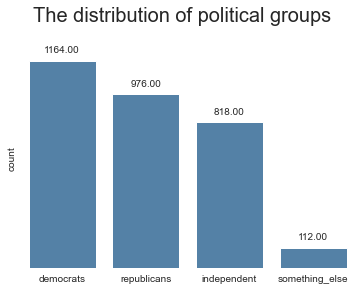

In [10]:
# count representatives of different political parties
democrats_num = df1[df1['Political Party'] == 2].count()[0]
republicans_num = df1[df1['Political Party'] == 1].count()[0]
independent_num = df1[df1['Political Party'] == 3].count()[0]
something_else_num = df1[df1['Political Party'] == 4].count()[0]

order_worry = ['Extremely','Very', 'Moderately', 'A little','Not at all']

party = ['democrats', 'republicans', 'independent', 'something_else']
count = [democrats_num, republicans_num, independent_num, something_else_num]
df_parties = pd.DataFrame(index=party)
df_parties['count'] = count

#Plotting
fig, ax = plt.subplots(figsize=(6,4))
g = sns.barplot(y=df_parties['count'], x=df_parties.index, color="steelblue")
get_rid_of_spine([ax])
label_each_bar([ax])
plt.suptitle("The distribution of political groups", y = 1.03, fontsize=20)
set_yticks_empty([g])

In [11]:
print('Percentage of democrats: ', democrats_num/total)
print('Percentage of republicans: ', republicans_num/total)
print('Percentage of independent: ', independent_num/total)
print('Percentage of someone else: ', something_else_num/total)

Percentage of democrats:  0.3791530944625407
Percentage of republicans:  0.31791530944625407
Percentage of independent:  0.2664495114006515
Percentage of someone else:  0.036482084690553744


As we can see, in regards to political parties, our dataset is not balanced, therefore I will be using proportions throughout this project to account for the differences. Also, I won't be analysing the "something else" category becuase there is not enough data to make any inferences. 

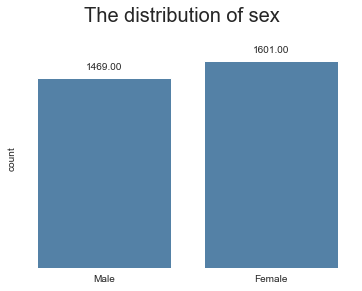

In [12]:
# count representatives of different sex
male_num = df1[df1['Sex'] == 1].count()[0]
female_num = df1[df1['Sex'] == 2].count()[0]

sex = ['Male', 'Female']
count = [male_num, female_num]
df_sex = pd.DataFrame(index=sex)
df_sex['count'] = count

#Plotting
fig, ax = plt.subplots(figsize=(6,4))
g = sns.barplot(y=df_sex['count'], x=df_sex.index, color="steelblue")
get_rid_of_spine([ax])
label_each_bar([ax])
plt.suptitle("The distribution of sex", y = 1.03, fontsize=20)
set_yticks_empty([g])

In [13]:
print('Percentage of male: ', male_num/total)
print('Percentage of female: ', female_num/total)

Percentage of male:  0.47850162866449514
Percentage of female:  0.5214983713355049


Regarding gender, our dataset is almost balanced and is representative of the current proportion of men to women in the United States. However, I think it will be easier to comprehend the information on the same scale. Therefore, I will also use proportions to visualize my findings.

## First, let's first see how Americans evaluate their feelings regarding the way things are going in the US in April of 2020:

<b>Question 1:</b>: Generally speaking, how do you feel about the way things are going in the country these days?<br>
&nbsp;&nbsp;&nbsp;&nbsp; <b>Question 1.1</b>: How worry do you feel?<br>
&nbsp;&nbsp;&nbsp;&nbsp; <b>Question 1.2</b>: How happy do you feel?<br>
<b>Variables:</b> [Worried], [Happy]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Not at all <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] A little <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Somewhat <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] Very <br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Extremly <br

In [14]:
# Data Manipulation
df_happy = df1[['Happy', 'Sex']]
df_worried = df1[['Worried', 'Sex']]

#replace values from integers to their corresponding string represenattions.
df_happy.loc[:, 'Happy'].replace(1, 'Not at all', inplace=True)
df_happy.loc[:, 'Happy'].replace(2, 'A little', inplace=True)
df_happy.loc[:, 'Happy'].replace(3, 'Somewhat', inplace=True)
df_happy.loc[:, 'Happy'].replace(4, 'Very', inplace=True)
df_happy.loc[:, 'Happy'].replace(5, 'Extremly', inplace=True)

df_happy.loc[:, 'Sex'].replace(1, 'Male', inplace=True)
df_happy.loc[:, 'Sex'].replace(2, 'Female', inplace=True)

df_worried.loc[:, 'Worried'].replace(1, 'Not at all', inplace=True)
df_worried.loc[:, 'Worried'].replace(2, 'A little', inplace=True)
df_worried.loc[:, 'Worried'].replace(3, 'Somewhat', inplace=True)
df_worried.loc[:, 'Worried'].replace(4, 'Very', inplace=True)
df_worried.loc[:, 'Worried'].replace(5, 'Extremly', inplace=True)

df_worried.loc[:, 'Sex'].replace(1, 'Male', inplace=True)
df_worried.loc[:, 'Sex'].replace(2, 'Female', inplace=True)

/Users/my_love/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


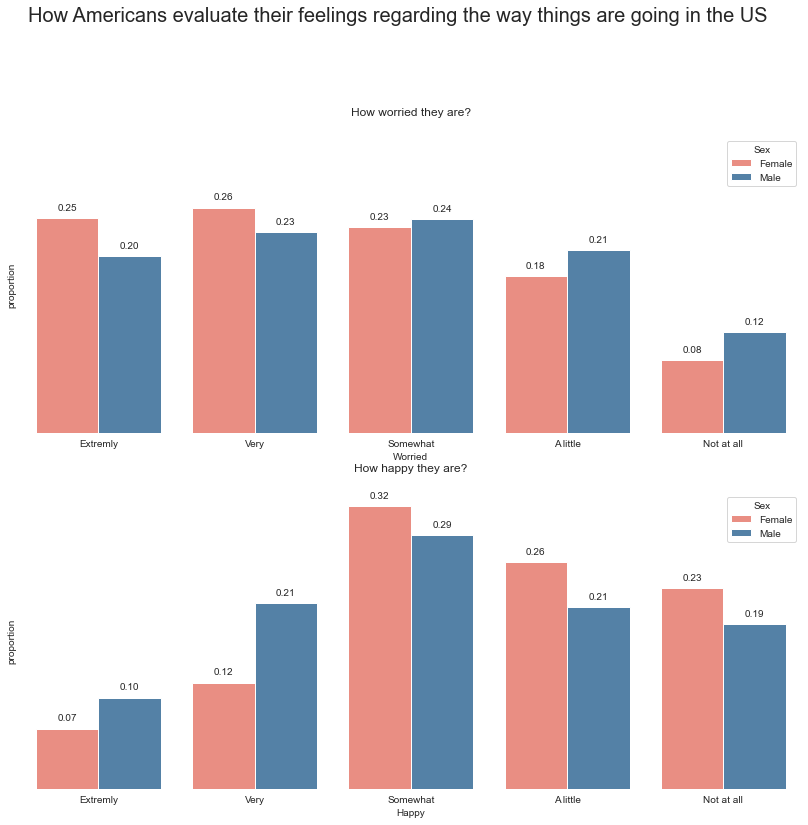

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,12), sharey=True)

x1, x2, y, hue = "Worried", "Happy", "proportion", "Sex"
order_feel = ['Extremly','Very', 'Somewhat', 'A little', 'Not at all']

g1 = build_bar_plot(x1, y, hue, ax1, order_feel, palette_sex, df_worried)
g2 = build_bar_plot(x2, y, hue, ax2, order_feel, palette_sex, df_happy)

# The amount of space above titles
y_title_margin = 1.05
plt.suptitle("How Americans evaluate their feelings regarding the way things are going in the US", y = 1.03, fontsize=20)
ax1.set_title("How worried they are?",  y = y_title_margin)
ax2.set_title("How happy they are?",y = y_title_margin)

axes = [ax1, ax2]

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2])

In [16]:
print('Percentage of Americans that are somewhat, a little, or not happy at all: ', 
      (941 + 718 + 643) / total * 100, '%')
print('Percentage of Americans that are very or extremly worried: ', 
      np.round((689 + 749) / total * 100, 2), '%')
print('Percentage of Americans that are moderately, very, or extremly worried: ', 
      np.round((689 + 749 + 735) / total * 100, 2), '%')

Percentage of Americans that are somewhat, a little, or not happy at all:  74.98371335504886 %
Percentage of Americans that are very or extremly worried:  46.84 %
Percentage of Americans that are moderately, very, or extremly worried:  70.78 %


The fact that almost 75% of Americans are only somewhat, a little, or not happy at all about how things are going in the US seems disturbing to me. As we can see, almost 47% of Americans are *extremely* or *very* worried about the country's current situation. Include those that are *somewhat* worried as well, and we bring the percentage up to over 70%.
<br>

Also, an interesting observation is that women seem to worry more than men. The distribution is slightly skewed to the right for women, while for men, the distribution is more uniform except for the *Not at all* category. Consequently, women are less happier about how things are going in the country.
For both men and women, the distribution of responses related to happiness resembles normal. However, the distribution of female responses is slightly skewed to the left. 

## So the question is what contributes to such worrisome results?


When we think about the country's overall situation, the first thing that frequently comes to mind is Politics. Some people are more involved into it, others prefer not get involved at all. But it is hard to avoid thinking about it. Let's see what how stressful thinking about politics is for men and women:

<b>Question 1:</b>: How stressful do you find thinking about politics?<br>
<b>Variables:</b> [Stress from Politics]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Extremely stressful<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] Very stressful <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Moderately stressful  <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] A little stressful <br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Not at all stressful <br>

/Users/my_love/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


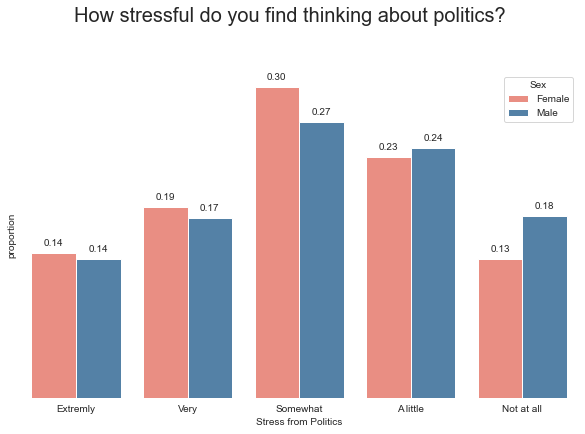

In [17]:
# Data Manipulation
df_stress = df1[['Stress from Politics', 'Sex']]

#replace values from integers to their corresponding string represenattions.
df_stress.loc[:, 'Stress from Politics'].replace(1, 'Extremly', inplace=True)
df_stress.loc[:, 'Stress from Politics'].replace(2, 'Very', inplace=True)
df_stress.loc[:, 'Stress from Politics'].replace(3, 'Somewhat', inplace=True)
df_stress.loc[:, 'Stress from Politics'].replace(4, 'A little', inplace=True)
df_stress.loc[:, 'Stress from Politics'].replace(5, 'Not at all', inplace=True)

df_stress.loc[:, 'Sex'].replace(1, 'Male', inplace=True)
df_stress.loc[:, 'Sex'].replace(2, 'Female', inplace=True)

fig, ax = plt.subplots(figsize=(10,6))

x1, y, hue = "Stress from Politics", "proportion", "Sex"
order_feel = ['Extremly','Very', 'Somewhat', 'A little', 'Not at all']

g1 = build_bar_plot(x1, y, hue, ax, order_feel, palette_sex, df_stress)

# The amount of space above titles
y_title_margin = 1.05
plt.suptitle("How stressful do you find thinking about politics?", y = 1.03, fontsize=20)

get_rid_of_spine([ax])
label_each_bar([ax])
set_yticks_empty([g1])

As we can see, the overall distribution is close to normal. However, it seems like women find thinking about politics a bit more stressful than men. 

---

Another important contributor to our overall stress is the state of the national economy and our personal finances. If we go back in time and see what news articles were there, we can definitely find a lot of information about stimulus checks and incredible losses caused by the economy lockdowns. 

For example, on the graph below we can see the change in revenue for small businesses ([source](https://www.brookings.edu/research/ten-facts-about-covid-19-and-the-u-s-economy/)):
<img src="../figs/COVIDFacts_Figure1_LO.png" alt='financial tree by micheile-henderson' style="width: 600px;"/>

In addition to that, a lot of people lost their jobs either temporarily or permanently.
So let's see how Americans were worried about the state of the national economy and their personal finances. 

<center><h2>National Economy and Personal Financial situation</h2></center>

<center><img src="../figs/micheile-henderson-lZ_4nPFKcV8-unsplash.jpg" align="center" alt='financial tree by micheile-henderson' style="width: 600px;"/></center>

**Question 2**: Overall, how worried are you about the national economy?<br>
<b>Variable:</b> [Nat. Econ]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Not at all worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] A little worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Moderately worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] Very worried<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Extremely worried<br>

**Question 3**: So far as you and your family are concerned, how worried are you about your current financial situation?<br>
<b>Variable:</b> [Fin.Situation]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Not at all worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] A little worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Moderately worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] Very worried<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Extremely worried<br>

<b>Question 4</b>: How worried are you about the economic impact of the coronavirus? <br>
<b>Variable:</b> [Covid.E]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Extremely worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] Very worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Moderately worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] A little worried<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Not at all worried<br>

First, let's take a close look at the correlation heatmap below: 

Text(0.5, 1.03, 'Correlation between economic situation and emotional wellbeing')

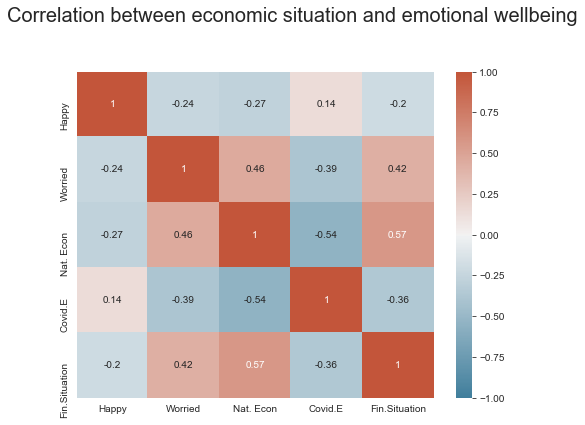

In [18]:
econ = df1[['Happy', 'Worried', 'Nat. Econ', 'Covid.E', 'Fin.Situation']]
fig = plt.subplots(figsize=(8,6))
g = sns.heatmap(econ.corr(), annot=True, vmin=-1, cmap=cmap)
plt.suptitle("Correlation between economic situation and emotional wellbeing", y = 1.03, fontsize=20)

We can see a positive correlation between worrying about the personal financial situation and overall situation in the country as well as worrying about the national economy. The same applies to the state of the national economy: the more someone is worried about the country's state, the more they are worried about the country overall. 

Note: We can see a negative correlation between the economic impact of Covid-19 and the state of the national economy. However, the scale of answers is reversed. That means that the actual correlation is actually positive.

### Do men and women have different level of concern regarding national economy and personal financial situation?

In [19]:
# Data Manipulation
df1.loc[:, 'Sex'].replace(1, 'Male', inplace=True)
df1.loc[:, 'Sex'].replace(2, 'Female', inplace=True)

#How worried are you about the national economy?
df1.loc[:, 'Nat. Econ'].replace(5, 'Extremely', inplace=True)
df1.loc[:, 'Nat. Econ'].replace(4, 'Very', inplace=True)
df1.loc[:, 'Nat. Econ'].replace(3, 'Moderately', inplace=True)
df1.loc[:, 'Nat. Econ'].replace(2, 'A little', inplace=True)
df1.loc[:, 'Nat. Econ'].replace(1, 'Not at all', inplace=True)

# So far as you and your family are concerned, how worried are you about your current financial situation?
df1.loc[:, 'Fin.Situation'].replace(5, 'Extremely', inplace=True)
df1.loc[:, 'Fin.Situation'].replace(4, 'Very', inplace=True)
df1.loc[:, 'Fin.Situation'].replace(3, 'Moderately', inplace=True)
df1.loc[:, 'Fin.Situation'].replace(2, 'A little', inplace=True)
df1.loc[:, 'Fin.Situation'].replace(1, 'Not at all', inplace=True)

# So far as you and your family are concerned, how worried are you about your current financial situation?
df1.loc[:, 'Covid.E'].replace(5, 'Not at all', inplace=True)
df1.loc[:, 'Covid.E'].replace(4, 'A little', inplace=True)
df1.loc[:, 'Covid.E'].replace(3, 'Moderately', inplace=True)
df1.loc[:, 'Covid.E'].replace(2, 'Very', inplace=True)
df1.loc[:, 'Covid.E'].replace(1, 'Extremely', inplace=True)

df_econ_gender = df1.loc[:, ['Nat. Econ', 'Covid.E', 'Fin.Situation', 'Sex']]

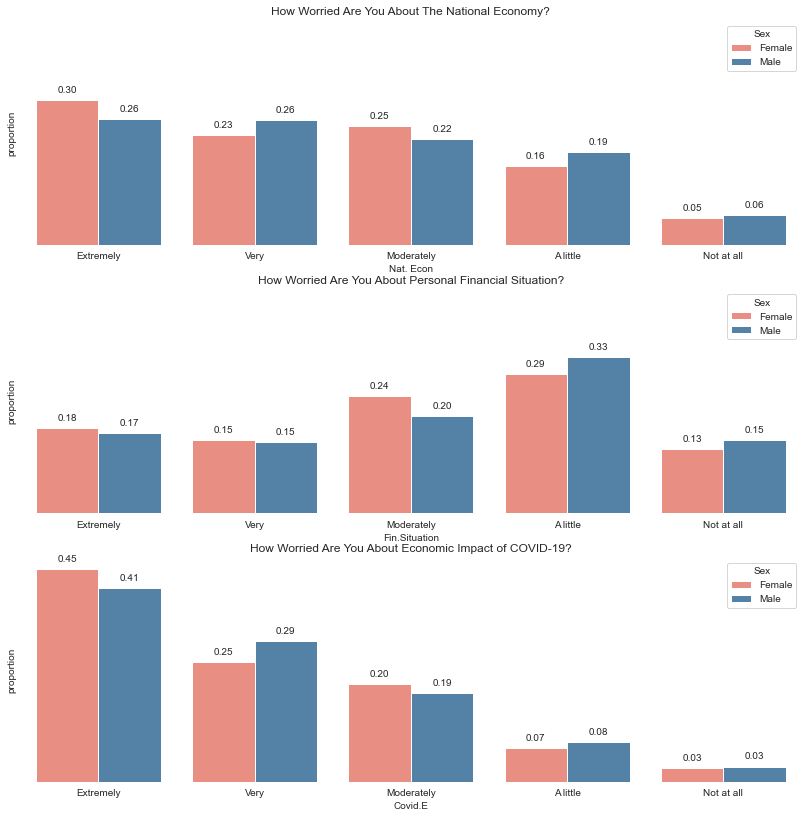

In [20]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,14), sharey=True)
x1, x2, x3, y, hue = "Nat. Econ", "Fin.Situation", "Covid.E", "proportion", "Sex"

g1 = build_bar_plot(x1, y, hue, ax1, order_worry, palette_sex, df_econ_gender)
g2 = build_bar_plot(x2, y, hue, ax2, order_worry, palette_sex, df_econ_gender)
g3 = build_bar_plot(x3, y, hue, ax3, order_worry, palette_sex, df_econ_gender)

axes = [ax1, ax2, ax3]

ax1.set_title('How Worried Are You About The National Economy?')
ax2.set_title('How Worried Are You About Personal Financial Situation?')
ax3.set_title('How Worried Are You About Economic Impact of COVID-19?')

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2, g3])

**Conclusion (gender specific):**
1. National Economy: we can see the overall downward trend, meaning the US population, independent of gender, was very worried about the state of the national economy. It also seems that women tend to worry a bit more about the national economy. Rephrasing it to answer my question: In 2020, the National economy was an important factor contributing to the worrisome emotional state of Americans, and it seems to influence women more than men.

2. Personal Finances: interestingly, the dominant category in this question is *A little*, while *Very* and *Not at all* have the same proportion of responses. However, for 57% of women and 52% of men, the financial situation was a moderate or higher concern. For them, it was a contributing factor to their anxiety and stress.

3. Economic Impact of Covid-19: From these plots, we can see that many more people are worried about the economic impact of Covid-19 than any of the other two questions. To be precise, 70% of both men and women are *extremely* or *very* concerned with the impact of Covid-19. 

### Do people with different political beliefs have diffenrent level of concern regarding national economy and personal fonancial situation?

In [21]:
# Generally speaking, do you usually think of yourself as a Republican, a Democrat, an independent, or what?
df1.loc[:, 'Political Party'].replace(1, 'Republican', inplace=True)
df1.loc[:, 'Political Party'].replace(2, 'Democrat', inplace=True)
df1.loc[:, 'Political Party'].replace(3, 'Independent', inplace=True)
df1.loc[:, 'Political Party'].replace(4, 'Something Else', inplace=True)

# Data Manipulation
df_econ_pol = df1.loc[:, ['Nat. Econ', 'Fin.Situation', 'Covid.E', 'Political Party']]

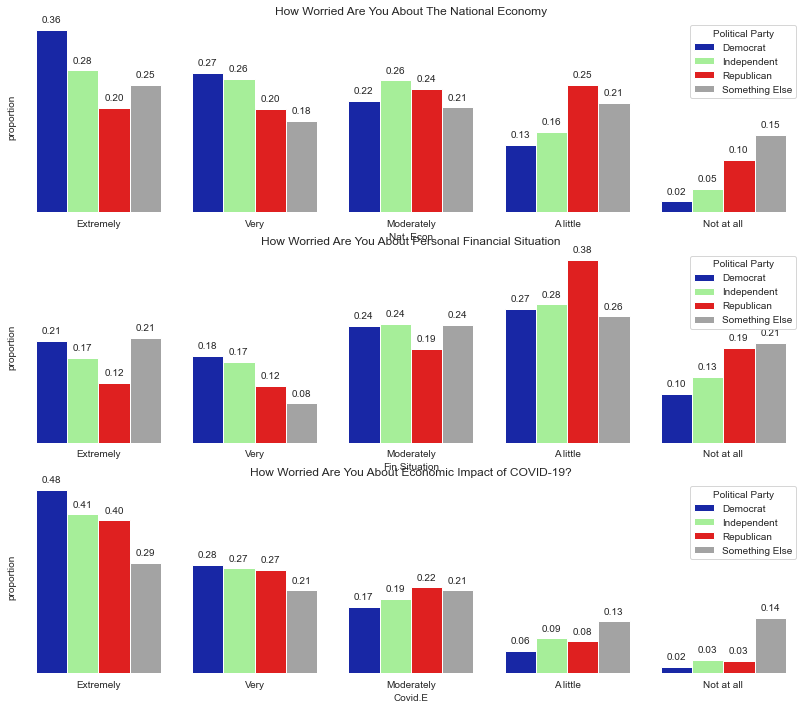

In [22]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,12))
x1, x2, x3, y, hue = "Nat. Econ", "Fin.Situation", "Covid.E", "proportion", "Political Party"

g1 = build_bar_plot(x1, y, hue, ax1, order_worry, cmap_pol, df_econ_pol)
g2 = build_bar_plot(x2, y, hue, ax2, order_worry, cmap_pol, df_econ_pol)
g3 = build_bar_plot(x3, y, hue, ax3, order_worry, cmap_pol, df_econ_pol)

axes = [ax1, ax2, ax3]

ax1.set_title('How Worried Are You About The National Economy')
ax2.set_title('How Worried Are You About Personal Financial Situation')
ax3.set_title('How Worried Are You About Economic Impact of COVID-19?')

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2, g3])

In [23]:
extremely = len(df_econ_pol[df_econ_pol.loc[:, 'Fin.Situation'] == "Extremely"])
very = len(df_econ_pol[df_econ_pol.loc[:, 'Fin.Situation'] == "Very"])
(extremely + very )/ total

0.3234527687296417

**Conclusion:** From the graphs above, we can see that when it comes to the state of the **National Economy**, most Democrats tend to be *extremely* or *very* worried, while the distribution of Republicans' and Independent group's responses are more uniformly distributed among all categories. 

Regarding **personal finances**, all groups are concentrated more in the middle to lower range: *moderately* and *a little*. While it was not a concern for most Americans, 39% of Democrats, 24% of Republicans, 34% of independent respondents, and 29% of others responded that they are *extremely* or *very* worried about their financial situation. As we know, for many Americans, 2020 was financially a hard time. Only in April 20.5 million Americans lost their jobs ([source](https://www.cnn.com/2020/05/08/economy/april-jobs-report-2020-coronavirus/index.html)), causing an unemployment rate of 14.7%. Also, there is a moderate correlation (0.36) between being worried about contracting COVID-19 and being worried about the personal financial situation: those who were worried about contracting the virus were also worried about their financial situation. 

**Impact of Covid-19:** Similarly to the previous section, most people are *ectremly* or *very* worried about the impact of Covid-19. To be precise: 70% of Democrats, 68% of Independent group, 67% of Republicans. 

**Side Note:** Even though it is not the focus of this study, I want to mention that it is impossible to say whether what we see on the graphs is a general trend or it was caused by the fact that both President and Senate were Republicans at the time when the survey was conducted. To answer this particular question, we would need historical data.

---

So now, as we already touched upon the impact of Coronavirus, let's take a closer look at it.

<center><h2>Health Concerns & Covid-19</h2></center>

<center><img src="../figs/prasesh-shiwakoti-lomash-moHiHqdmUYY-unsplash.jpg" align="center" alt='positive covid test by prasesh-shiwakoti' style="width: 600px;"/></center>

<b>Question 4:</b>: How worried are you personally about getting the coronavirus (COVID-19)?<br>
<b>Variables:</b> [covid1]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Extremely worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] Very worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Moderately worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] A little worried <br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Not at all worried <br>

I decided to also include Americans' evaluation of their own health. <br>
<b>Question 5:</b>: Would you say that in general your health is:<br>
<b>Variables:</b> [health]<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] Poor <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] Fair <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] Good <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] Very good <br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Excellent <br>

To have a better understanding of the responses to the Question 4, let's take a look at the following facts:
* April 4: The coronavirus infected more than 1.1 million people and killed more than 60,000 worldwide, according to Johns Hopkins University. The US has more than 300,000 cases and more than 8,100 deaths, according to revised figures.
* By April 9 there had been more COVID-19–related deaths in New York and New Jersey than in the rest of the United States combined (New York Times 2020).
* By mid-April, cases had been confirmed in all fifty U.S. states
* April 20: The coronavirus sickened almost 2.5 million people worldwide and killed more than 170,000, according to Johns Hopkins University. In the U.S., more than 42,000 have died and over 787,000 have contracted COVID-19.
* ... 

So, how worried are you personally about getting the coronavirus (COVID-19)?

Text(0.5, 1.0, 'Correlation Heatmap')

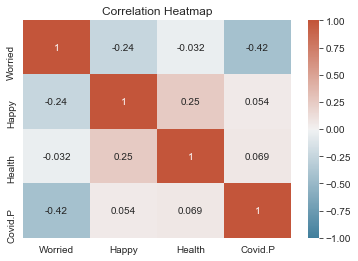

In [24]:
df_health = df1.loc[:, ['Worried', 'Happy', 'Health', 'Covid.P', 'Sex']]
sns.heatmap(df_health.corr(), cmap=cmap, annot=True, vmin=-1)
plt.title('Correlation Heatmap')

As we can see from the heatmap, being worried about contracting COVID-19 correlates with being worried about the country's situation overall. The simplest explanation is that it is all about the situation in the country during the pandemic. You are not safe when cases raise.

**Note:** that the coefficient is negative, though because the scale is reversed, the dependency is actually positive. In other words, the more worried the respondent is about contracting COVID-19, the more they are worried about how things are going in the country overall.

Interestingly, the health is uncorrelated with being worried about contracting COVID-19, but it is positively (weakly) correlated with being happy about how things are going in the country overall.

### Let's see if that's the same for men and women:

In [25]:
# Data Manipulation
# Would you say that in general your health is:
df1.loc[:, 'Health'].replace(1, 'Poor', inplace=True)
df1.loc[:, 'Health'].replace(2, 'Fair', inplace=True)
df1.loc[:, 'Health'].replace(3, 'Good', inplace=True)
df1.loc[:, 'Health'].replace(4, 'Very good', inplace=True)
df1.loc[:, 'Health'].replace(5, 'Excellent', inplace=True)

# How worried are you personally about getting the coronavirus (COVID-19)?
df1.loc[:, 'Covid.P'].replace(1, 'Extremely', inplace=True)
df1.loc[:, 'Covid.P'].replace(2, 'Very', inplace=True)
df1.loc[:, 'Covid.P'].replace(3, 'Moderately', inplace=True)
df1.loc[:, 'Covid.P'].replace(4, 'A little', inplace=True)
df1.loc[:, 'Covid.P'].replace(5, 'Not at all', inplace=True)
df_health = df1.loc[:, ['Worried', 'Happy', 'Health', 'Covid.P', 'Sex']]

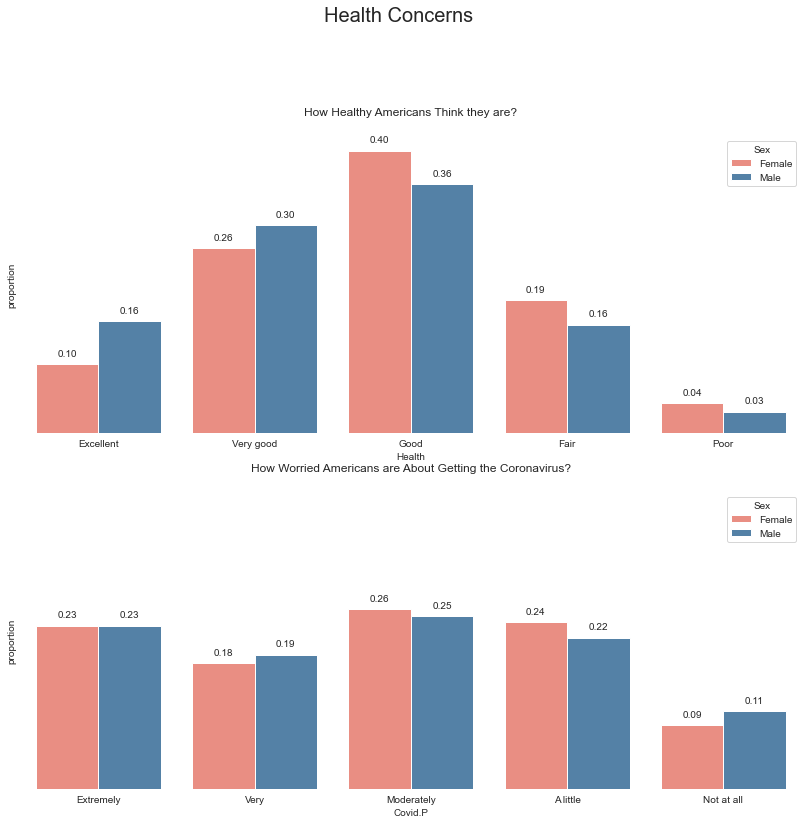

In [26]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,12), sharey=True)

order_health=['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
x1, x2, y, hue = "Health", "Covid.P", "proportion", "Sex"

g1 = build_bar_plot(x1, y, hue, ax1, order_health, palette_sex, df_health)
g2 = build_bar_plot(x2, y, hue, ax2, order_worry, palette_sex, df_health)


# The amount of space above titles
y_title_margin = 1.05
plt.suptitle("Health Concerns", y = 1.03, fontsize=20)
ax1.set_title("How Healthy Americans Think they are?",  y = y_title_margin)
ax2.set_title("How Worried Americans are About Getting the Coronavirus?",y = y_title_margin)

axes = [ax1, ax2]

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2])


**Conclusion:**

From the diagram above, we can see that the responses related to overall health are normally distributed. More men than women tend to evaluate their health as above average (*very good* & *excellent*). However, it doesn't necessarily mean that men have better health than women because respondents were not given a set of characteristics for what is considered *Good* or *Excellent* health. 

Regarding concerns about contracting Covid-19, there is no significant difference between men and women. Moreover, all responses are distributed more or less uniformly. Around 67% of Americans were *moderately*, or higher worried about contracting COVID-19.

### Let's see if people with different political beliefs have diffenrent level of concern regarding COVID-19:

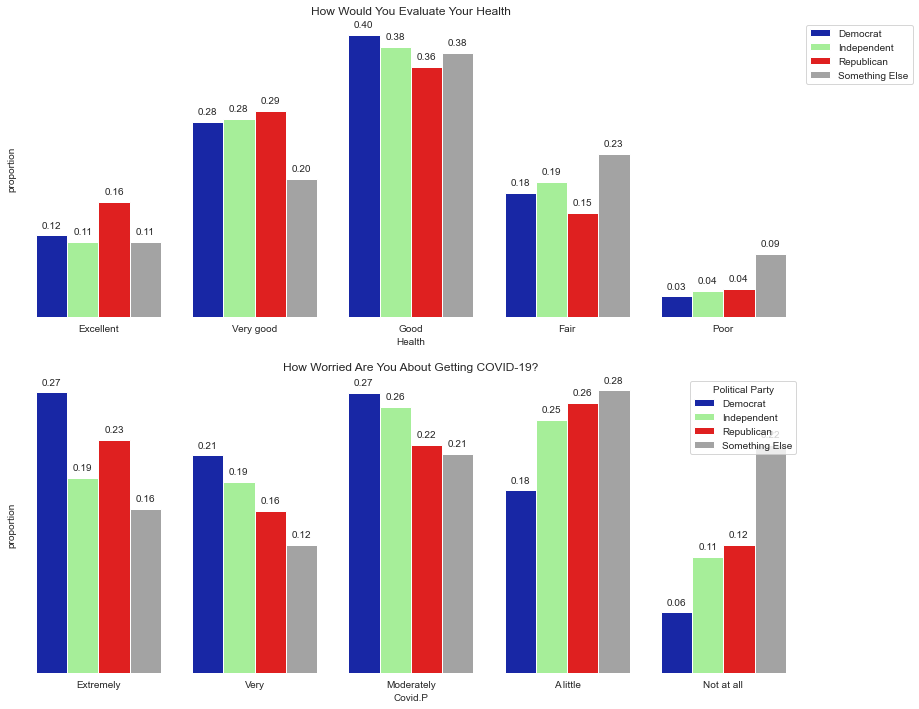

In [27]:
# Data Manipulation
df_health_pol = df1.loc[:, ['Health', 'Covid.P', 'Political Party']]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,12))
x1, x2, y, hue = 'Health', 'Covid.P', "proportion", 'Political Party'
order_health = ["Excellent", 'Very good', 'Good', 'Fair', 'Poor']

g1 = build_bar_plot(x1, y, hue, ax1, order_health, cmap_pol, df_health_pol)
g2 = build_bar_plot(x2, y, hue, ax2, order_worry, cmap_pol, df_health_pol)

ax2.set_title('How Worried Are You About Getting COVID-19?')
ax1.set_title('How Would You Evaluate Your Health')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')

get_rid_of_spine([ax1, ax2])
label_each_bar([ax1, ax2])
set_yticks_empty([g1, g2])

**Conclusion:**

When it comes to **health**, all health categories are normally distributed with no significant differences between the political groups within each category.

Similarly to the National Economic question, democrats seem to worry about contracting **COVID-19** more than any other group. This is true for the following three categories: *Extremely*, *Very*, and *Moderately*. 

Thus, we can conclude that for democrats, COVID-19 had a slightly more significant impact on their mental health. However, it is unclear whether they were worried more because of their political views or other demographic or economic factors. Further analysis is needed to shed light on this situation.

---

When situations like COVID-19 happen, people frequently look for the support of their close family members and friends. Together it is easier to go through difficult life situations. Unfortunately, for different reasons, this support might be unavailable. 2020 was a politically active year that divided the Unites States into reds and blues. In the next section, I want to explore whether the relationships with closed ones were hurt due to differences in political views. I think it is important because because those people potentially had a higher risk additional stress and anxiety. 

<center><h2>Relationships With Loved Ones</h2></center>

<center><img src="../figs/helena-lopes-PGnqT0rXWLs-unsplash.jpg" align="center" alt='friends and family by helena-lopes' style="width: 600px;"/></center>

<b>Question:</b>: In the past four years, how much have political differences hurt your relationships with close family members / friends?<br>
<b>Variables:</b> ['Hurt Relat. with Family'], ['Hurt Relat. with Friends']<br>
<b>Possible Answers:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;[1] A great deal <br>
&nbsp;&nbsp;&nbsp;&nbsp;[2] A lot <br>
&nbsp;&nbsp;&nbsp;&nbsp;[3] A moderate amount <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4] A little <br>
&nbsp;&nbsp;&nbsp;&nbsp;[5] Not at all <br>

<AxesSubplot:>

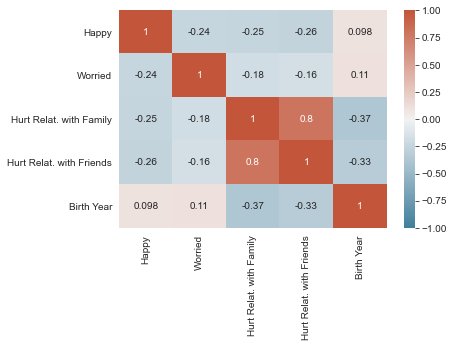

In [28]:
df_relationships = df1[['Happy', 'Worried', 'Hurt Relat. with Family', 'Hurt Relat. with Friends', 'Birth Year']]
sns.heatmap(df_relationships.corr(), annot=True, vmin = -1, cmap=cmap)

Let's analyze this heatmap step by step:
1. An interesting observation is that the two questions we are analyzing are highly correlated with the respondent's age (birth year, to be more specific).
2. Both of the questions are weakly correlated with being worried about how things are going in the country overall: the more political difference hurt your relationships with loved ones, the more worried about the state of the country they are. (Note that the scale is reversed)
3. Finally, an intersting observation is that both of the questions are negatively correlated with happiness. However, considering that the scale is reversed, it is the same as saying that the correlation is positive: the more one's relationships were hurt, the happier that person is about the state of the country. Absurd!

I can think of three possible reasons why that might happen:
1. There are other (possibly hidden) features that influence the correlation.
2. Our dataset is unbalnced. 
3. It happens. Just as US spendings on technology, space, and science strongly correlates with suicides by hanging, suffocation, and strangulation ([source](https://www.tylervigen.com/spurious-correlations)).

The first reason is very probable though it is imposible to know with the current dataset.

Therefore, let's check if the dataset is balanced.

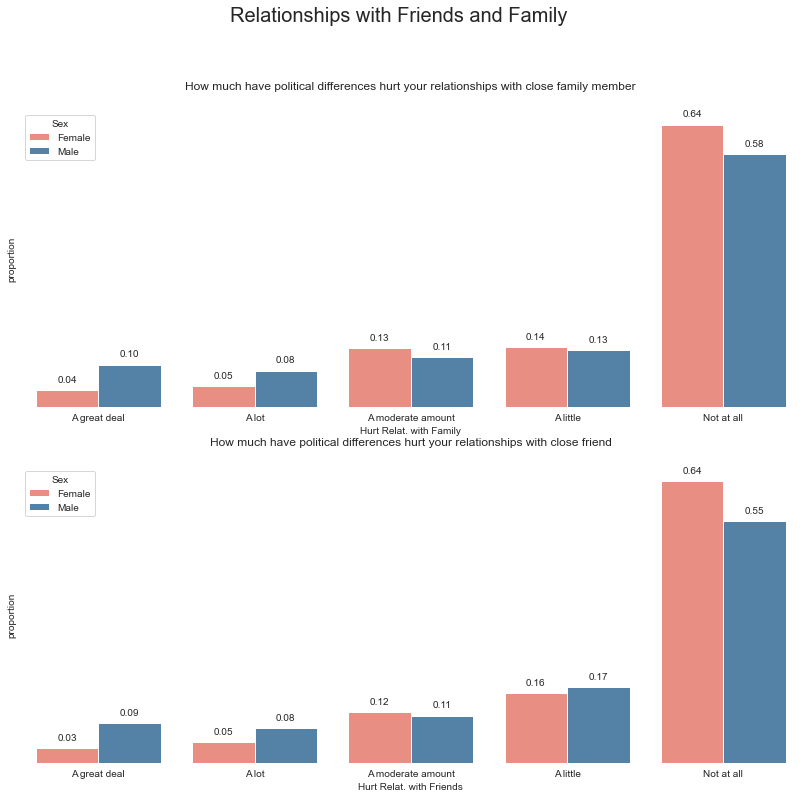

In [29]:
# How worried are you personally about getting the coronavirus (COVID-19)?
df1.loc[:, 'Hurt Relat. with Friends'].replace(1, 'A great deal', inplace=True)
df1.loc[:, 'Hurt Relat. with Friends'].replace(2, 'A lot', inplace=True)
df1.loc[:, 'Hurt Relat. with Friends'].replace(3, 'A moderate amount', inplace=True)
df1.loc[:, 'Hurt Relat. with Friends'].replace(4, 'A little', inplace=True)
df1.loc[:, 'Hurt Relat. with Friends'].replace(5, 'Not at all', inplace=True)

df1.loc[:, 'Hurt Relat. with Family'].replace(1, 'A great deal', inplace=True)
df1.loc[:, 'Hurt Relat. with Family'].replace(2, 'A lot', inplace=True)
df1.loc[:, 'Hurt Relat. with Family'].replace(3, 'A moderate amount', inplace=True)
df1.loc[:, 'Hurt Relat. with Family'].replace(4, 'A little', inplace=True)
df1.loc[:, 'Hurt Relat. with Family'].replace(5, 'Not at all', inplace=True)

df_relationships = df1.loc[:, ['Worried', 'Happy', 'Hurt Relat. with Friends', 'Hurt Relat. with Family', 'Sex']]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,12), sharey=True)

order_relationships=['A great deal', 'A lot', 'A moderate amount', 'A little', 'Not at all']
x1, x2, y, hue = 'Hurt Relat. with Family', 'Hurt Relat. with Friends', "proportion", "Sex"

g1 = build_bar_plot(x1, y, hue, ax1, order_relationships, palette_sex, df_relationships)
g2 = build_bar_plot(x2, y, hue, ax2, order_relationships, palette_sex, df_relationships)


# The amount of space above titles
y_title_margin = 1.05
plt.suptitle("Relationships with Friends and Family", y = 1, fontsize=20)
ax1.set_title("How much have political differences hurt your relationships with close family member",  y = y_title_margin)
ax2.set_title("How much have political differences hurt your relationships with close friend",y = y_title_margin)
ax2.legend(title='Sex', loc='upper left')
axes = [ax1, ax2]

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2])

In [30]:
a_great_deal_fam = df_relationships[df_relationships['Hurt Relat. with Family'] == 'A great deal'].count()[0]
a_great_deal_fam = np.round(a_great_deal_fam/total * 100, 2)
print('Percent of population whose relationships with close family member were hurt a great deal due to the difference in political views: ', a_great_deal_fam, '%')

Percent of population whose relationships with close family member were hurt a great deal due to the difference in political views:  6.64 %


In [31]:
a_lot_fam = df_relationships[df_relationships['Hurt Relat. with Family'] == 'A lot'].count()[0]
a_lot_fam = np.round(a_lot_fam/total * 100, 2)
print('Percent of population whose relationships with close family member were hurt a lot due to the difference in political views: ', a_lot_fam, '%')

Percent of population whose relationships with close family member were hurt a lot due to the difference in political views:  6.45 %


In [32]:
a_great_deal_fr = df_relationships[df_relationships['Hurt Relat. with Friends'] == 'A great deal'].count()[0]
a_great_deal_fr = np.round(a_great_deal_fr/total * 100, 2)
print('Percent of population whose relationships with close friends were hurt a great deal due to the difference in political views: ', a_great_deal_fr, '%')

Percent of population whose relationships with close friends were hurt a great deal due to the difference in political views:  6.06 %


In [33]:
a_lot_fam = df_relationships[df_relationships['Hurt Relat. with Friends'] == 'A lot'].count()[0]
a_lot_fam = np.round(a_lot_fam/total * 100, 2)
print('Percent of population whose relationships with close friends were hurt a lot due to the difference in political views: ', a_lot_fam, '%')

Percent of population whose relationships with close friends were hurt a lot due to the difference in political views:  6.29 %


**Conclusion:** As we can see from the diagrams above and the percentages of those whose relationships were hurt, we can conclude that our dataset is highly unbalanced.
Bargraphs also suggest that differences in political views hurt men's relationships with close family members and friends more than women's. However, since the dataset is unbalanced, we should take this conclusion with a grain of salt. 

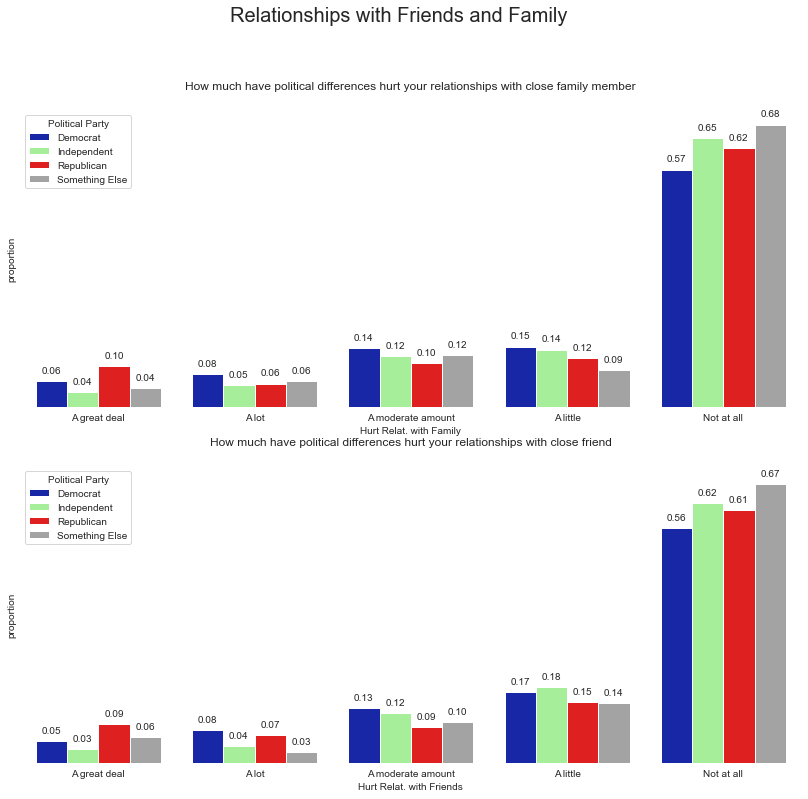

In [34]:
df_relationships_pol = df1.loc[:, ['Worried', 'Happy', 'Hurt Relat. with Friends', 'Hurt Relat. with Family', 'Political Party']]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,12), sharey=True)

order_relationships=['A great deal', 'A lot', 'A moderate amount', 'A little', 'Not at all']
x1, x2, y, hue = 'Hurt Relat. with Family', 'Hurt Relat. with Friends', "proportion", "Political Party"

g1 = build_bar_plot(x1, y, hue, ax1, order_relationships, cmap_pol, df_relationships_pol)
g2 = build_bar_plot(x2, y, hue, ax2, order_relationships, cmap_pol, df_relationships_pol)


# The amount of space above titles
y_title_margin = 1.05
plt.suptitle("Relationships with Friends and Family", y = 1, fontsize=20)
ax1.set_title("How much have political differences hurt your relationships with close family member",  y = y_title_margin)
ax2.set_title("How much have political differences hurt your relationships with close friend",y = y_title_margin)
ax2.legend(title='Political Party', loc='upper left')
axes = [ax1, ax2]

get_rid_of_spine(axes)
label_each_bar(axes)
set_yticks_empty([g1, g2])

**Conclusion:** There doesn't seem to be a difference in how people of different political views responded to these questions. But again, the dataset is unbalanced, and such a conclusion could be unrepresentative of the truth.

## Are people of different ages affected equally?

In [35]:
df_relationships_year = df[['worried', 'happy', 'birthyr', 
                            'impact8', 'impact9']]

year_list = range(1935,2005, 5)
responses = range(1, 5)

# We don't have enough data up until 1937. Therefore I will start the analysis from 1937
to_drop = list(df1[df1['Birth Year'] < 1937].index)
df_relationships_year = df_relationships_year.drop(to_drop)

# Rename Columns
column_labels=['Worried', 'Happy', 'Birth Year', 'Hurt Relat. with Family', 'Hurt Relat. with Friends']
df_relationships_year.columns = column_labels
df_relationships_year = df_relationships_year.groupby('Birth Year')
df_relationships_year = df_relationships_year.mean()

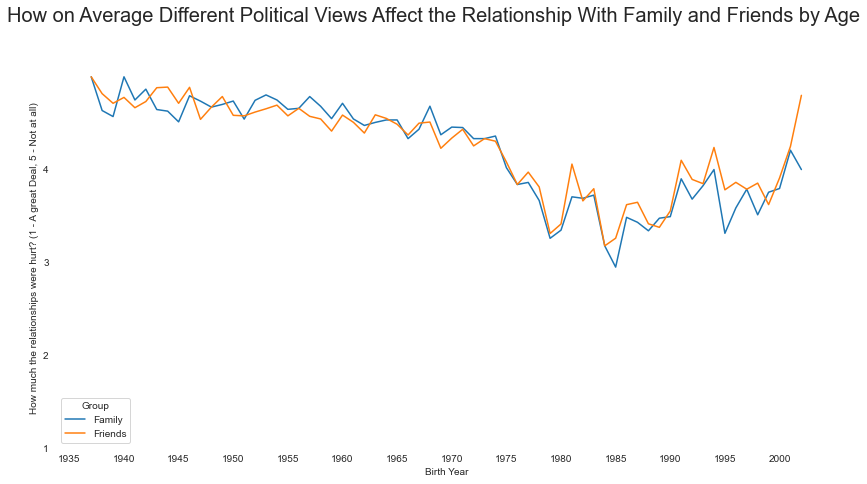

In [36]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set_style('whitegrid')
g1 = sns.lineplot(x=df_relationships_year.index,
                  y=df_relationships_year['Hurt Relat. with Family'],
                  label='Family')
g2 = sns.lineplot(x=df_relationships_year.index,
                  y=df_relationships_year['Hurt Relat. with Friends'],
                  label='Friends')
ax.set(ylabel='How much the relationships were hurt? (1 - A great Deal, 5 - Not at all)')
plt.suptitle("How on Average Different Political Views Affect the Relationship With Family and Friends by Age", 
             y = 1, 
             fontsize=20)
plt.legend(title='Group')

get_rid_of_spine([ax])
g1.axes.get_xaxis().set_ticks(year_list)
g1.axes.get_yaxis().set_ticks(responses)

**Conclusion:** As we can see from the graph, older people's relationships are usually less affected by the differences in political views than younger people's relationships. Another interesting observation is that family relations are less affected than relationships with friends for people born before 1975 (the blue line is above the orange one). However, this dynamic changes for people who were born after 1975. The difference in political views affects relationships with friends less than family relationships (the orange line is above the blue line). Thus, we can conclude that the **younger population under the age of 50 tend to have their relationships with loved ones hurt.** 

Now, as we know what some of the causes for anxiety are and whom they affect more, can we find a universal solution to this problem?<br>
We all know the phrase: **money can't buy happiness**. But is it true? Or can money reduce our anxiety?

<center><h2>Is there a dependency between our income and being happy/worried about how things are going in the country?</h2></center>
<center><img src="../figs/alexander-mils-lCPhGxs7pww-unsplash.jpg" align="center" alt='money by alexander mils' style="width: 600px;"/></center>

The dataset contains three columns that represent income:
1. [inc_anes] Income All 2019 liv. together
2. [inc_cps] Income All Past 12
3. [inc_cpsmod] Income All Past 12 liv. together

Each respondent answered only one of them, depending on the randomly assigned type of survey. Questions differ by following conditions:
1. Asks for the total income in 2019 of all family members that are living with a respondent?
2. Asks for the total income during the past 12 months of all family members?
3. Asks for the total income during the past 12 months of all family members that are living with a respondent?

While the 12 months period versus 2019 may not make a big difference because survey was conducted in April of 2020, the 'living together' condition will probably add inaccuracies to my analysis because not all family members live together. I will keep this in mind when concluding the findings.

**Note:** Number 66 is a placeholder to indicate that the person completed another type of survey. Therefore, I will first replace all 66 by 0 and then add values in all three columns together to get a single column with incomes. 

In [37]:
df_income = df[['worried', 'happy', 'birthyr',
                'impact8', 'impact9',
                'finworry', 'confecon', 
                'covid1', 'covid2', 
                'inc_anes', 'inc_cps', 'inc_cpsmod']]

column_labels=['Worried', 'Happy', 'Birth Year',
               'Hurt Relat. with Family', 'Hurt Relat. with Friends',
               'Fin.Situation', 'Nat. Econ',
               'Covid.P', 'Covid.E', 
               'Income All 2019 liv. together', 'Income All Past 12', 'Income All Past 12 liv. together']

df_income.columns = column_labels

df_income = df_income.replace(66, 0)
df_income['income'] = df_income['Income All 2019 liv. together'] + \
                      df_income['Income All Past 12'] + \
                      df_income['Income All Past 12 liv. together']
df_income.drop(columns=['Income All 2019 liv. together', 'Income All Past 12', 'Income All Past 12 liv. together'], inplace = True)

<AxesSubplot:>

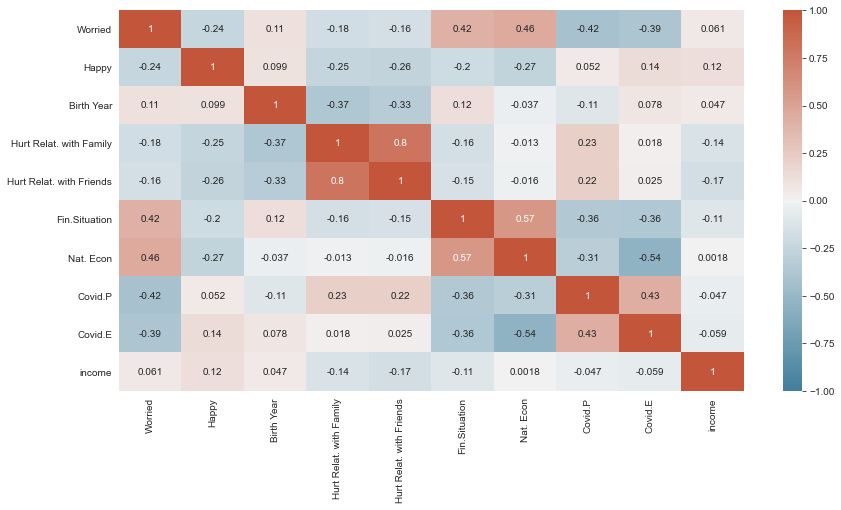

In [38]:
fig = plt.subplots(figsize=(14,7))
sns.heatmap(df_income.corr(), annot=True, cmap=cmap, vmin=-1)

On the heatmap above we can see that in general the correlation between income all other variables that we have seen in the previous sections of my analysis is pretty weak. Since correlation coefficients are pretty weak and I can't say that there is a strong dependency between income and any other column of interest. 

**Thus, my conclusion is that money can't make people happy. People can.**

<center><h1>Conclusion</h1></center>

## What Affected Our Emotional Well-being in 2020?

Many things: 
- the state of National Economy negatively affected the well-being of most Americans. 
- personal finances and COVID-19 were a moderate concerns. 
- luckily, only a relatively small number of American families' relationships were hurt by the differences in their political views, so we couldn't draw a definite conclusion about whether/how it affected their well-being. 
- an interesting observation: the healthier people consider themself, the happier they were about the state of the country overall; in other words, good physical health positively affected emotional well-being. 

## Does It Vary for Different Social Groups?
### Women vs Men
1. Women find politics more styressful than men. 
1. Women were less happy about how things are going in the country than men. Conversely, women seemed to worry about the state of the country more than men. 
1. The state of the national economy negatively affected women more than men.  
1. Personal finances was a moderate concern for most men and women. 
1. Men and women were similarly concerned regarding contracting Covid-19. 
1. Differences in political views possibly hurt men's relationships with close family members and friends more than women's. 

### Age
1. It seems like the relationships of younger people (50 y.o. or less) were hurt more than of those who are older.
1. Older people seem to have their friendship relationships hurt more than the relationships with their family, which is the opposite for younger people.

### Democrats vs Republicans vs Independent group
1. Democrats were more worried about the state of the National Economy and contracting COVID-19 than any other political group.
1. All groups were equally (moderately) worried about their personal finances.
1. Relationships of both all parties were affected equally. 
<br>
<br> 
Taking all of this into account, I conclude that in 2020 women were at higher risk of anxiety disorders due to the unstable country's economic and political situation.

**My recommendation:** Most of us can't do anything about National Economy, but we can protect our relationships with loved ones and take care of our physical health. It will help us go through difficult life situation. 